# defaultdict

What is defaultdict in Python?

defaultdict is a subclass of the built-in dict class, available in the collections module. It overrides one method (__missing__(key)) to provide a default value for non-existent keys. You provide a "factory function" when you create a defaultdict, and this function is called without any arguments to produce the default value whenever a missing key is accessed.

Key Characteristics of defaultdict:

* Dictionary-like: Behaves like a regular Python dictionary, supporting the same operations (getting, setting, deleting keys, iteration, etc.).
* Default Value for Missing Keys: The key difference is how it handles missing keys. Instead of raising a KeyError, it calls the factory function you provided to create a default value for that key and then returns it. The new key-value pair is also added to the dictionary.
* Ordered (in Python 3.7+): Like regular dictionaries, defaultdict remembers insertion order in Python 3.7 and later.
* Mutable: You can add, remove, and update key-value pairs.
* Unique Keys: Keys within a defaultdict must be unique.
* Heterogeneous Values: Values can be of any data type.
* Keys Must Be Hashable: Keys must be of an immutable and hashable type.

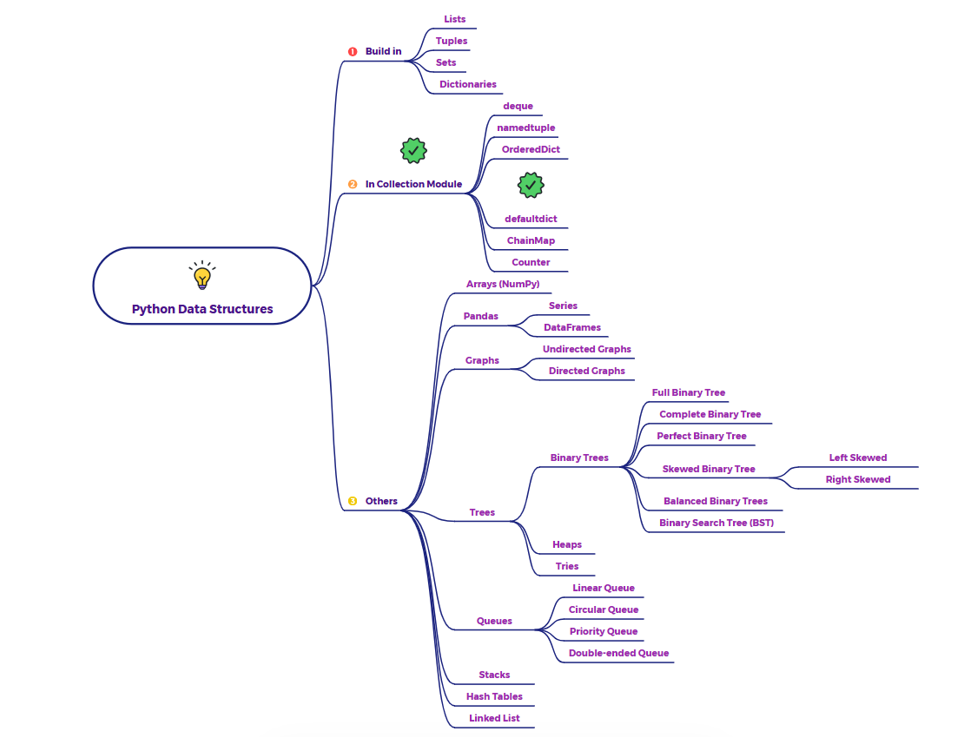


# 1. Define a Utility function to print highlighted characteristics

In [74]:
import collections

def highlight_characteristic(name, description, symbol='='):
    """Helper function to print highlighted characteristics."""
    print(f"\n{symbol*5} {name.upper()} {symbol*5}")
    print(description)
    print(f"{symbol*5} {name.upper()} {symbol*5}\n")

print("--- Python Defaultdict Data Structure: Sales Data Aggregation Example ---")

--- Python Defaultdict Data Structure: Sales Data Aggregation Example ---


In [75]:
# Defining the default_factory

highlight_characteristic(
    "Defining Default Factory",
    "The core of defaultdict is its 'default_factory', a function that's called to provide a default value for a missing key."
)

# Scenario: Aggregate sales by region. Each region will have a list of sales amounts.
# We'll use list as the default_factory, so if a region is new, it gets an empty list.
sales_by_region = collections.defaultdict(list)
print(f"Initialized sales_by_region (default_factory=list): {sales_by_region}")

# Scenario: Count occurrences of products sold. Each product will start with count 0.
# We'll use int as the default_factory.
product_sales_count = collections.defaultdict(int)
print(f"Initialized product_sales_count (default_factory=int): {product_sales_count}\n")


===== DEFINING DEFAULT FACTORY =====
The core of defaultdict is its 'default_factory', a function that's called to provide a default value for a missing key.
===== DEFINING DEFAULT FACTORY =====

Initialized sales_by_region (default_factory=list): defaultdict(<class 'list'>, {})
Initialized product_sales_count (default_factory=int): defaultdict(<class 'int'>, {})



# 2. Default Value for Missing Keys (Primary Feature):

* When sales_by_region['North'].append(sales_amount) is executed for the first time for 'North', 'North' is missing. defaultdict(list) automatically creates [] as the value for 'North' before .append() is called.
* Similarly, for product_sales_count[product] += 1, if 'Laptop' is encountered for the first time, defaultdict(int) sets product_sales_count['Laptop'] to 0 (the default for int) before += 1 increments it.
* This significantly reduces boilerplate code compared to checking if key in dict: ... else: ....

In [76]:
# 1. Default Value for Missing Keys Characteristic

highlight_characteristic(
    "Default Value for Missing Keys (Primary Feature)",
    "When a key is accessed for the first time and is not present, the default_factory is called, and its result is automatically inserted as the value for that key."
)

print("Aggregating sales data:")
sales_data = [
    ("North", 150),
    ("South", 200),
    ("North", 100), # Existing key
    ("East", 300),  # New key
    ("South", 50)   # Existing key
]

for region, sales_amount in sales_data:
    print(f"Processing sales for '{region}': {sales_amount}")
    # No need to check 'if region in sales_by_region:', defaultdict handles it!
    sales_by_region[region].append(sales_amount)
    print(f"  Current sales_by_region: {sales_by_region}")

print(f"\nFinal Sales by Region: {sales_by_region}")

# Example with int default_factory: counting product sales
products_sold = ["Laptop", "Mouse", "Keyboard", "Laptop", "Mouse", "Laptop"]
for product in products_sold:
    print(f"Processing sale for '{product}'")
    product_sales_count[product] += 1 # Increments from 0 if new, or existing count
    print(f"  Current product_sales_count: {product_sales_count}")

print(f"\nFinal Product Sales Count: {product_sales_count}\n")


===== DEFAULT VALUE FOR MISSING KEYS (PRIMARY FEATURE) =====
When a key is accessed for the first time and is not present, the default_factory is called, and its result is automatically inserted as the value for that key.
===== DEFAULT VALUE FOR MISSING KEYS (PRIMARY FEATURE) =====

Aggregating sales data:
Processing sales for 'North': 150
  Current sales_by_region: defaultdict(<class 'list'>, {'North': [150]})
Processing sales for 'South': 200
  Current sales_by_region: defaultdict(<class 'list'>, {'North': [150], 'South': [200]})
Processing sales for 'North': 100
  Current sales_by_region: defaultdict(<class 'list'>, {'North': [150, 100], 'South': [200]})
Processing sales for 'East': 300
  Current sales_by_region: defaultdict(<class 'list'>, {'North': [150, 100], 'South': [200], 'East': [300]})
Processing sales for 'South': 50
  Current sales_by_region: defaultdict(<class 'list'>, {'North': [150, 100], 'South': [200, 50], 'East': [300]})

Final Sales by Region: defaultdict(<class 'l

# 3. Dictionary-like:

* defaultdict instances support all standard dictionary operations: accessing keys, iterating through keys(), values(), items(), using the in operator, and clear(). They behave like regular dictionaries once a key has a value.

In [77]:
# 2. Dictionary-like Characteristic

highlight_characteristic(
    "Dictionary-like",
    "Defaultdict behaves almost identically to a standard dictionary for existing keys and common operations."
)

print(f"Current sales_by_region: {sales_by_region}")
print(f"Sales for 'North': {sales_by_region['North']}") # Access existing key
print(f"All regions (keys): {list(sales_by_region.keys())}")
print(f"All sales lists (values): {list(sales_by_region.values())}")
print(f"All items: {list(sales_by_region.items())}")

# Check if a key exists using 'in' (works as usual)
if 'East' in sales_by_region:
    print(" 'East' region found in sales_by_region.")
if 'West' not in sales_by_region:
    print(" 'West' region not found initially (but accessing it would create it!).")


===== DICTIONARY-LIKE =====
Defaultdict behaves almost identically to a standard dictionary for existing keys and common operations.
===== DICTIONARY-LIKE =====

Current sales_by_region: defaultdict(<class 'list'>, {'North': [150, 100], 'South': [200, 50], 'East': [300]})
Sales for 'North': [150, 100]
All regions (keys): ['North', 'South', 'East']
All sales lists (values): [[150, 100], [200, 50], [300]]
All items: [('North', [150, 100]), ('South', [200, 50]), ('East', [300])]
 'East' region found in sales_by_region.
 'West' region not found initially (but accessing it would create it!).


# 4. Ordered (in Python 3.7+):

* The sales_by_region example clearly shows that keys are stored and retrieved in the order they were first inserted (i.e., 'North', then 'South', then 'East'). This characteristic aligns with standard Python dict behavior since Python 3.7.

In [78]:
# 3. Ordered (in Python 3.7+) Characteristic

highlight_characteristic(
    "Ordered (Insertion Order - Python 3.7+)",
    "Like standard dictionaries, defaultdicts also retain the order in which key-value pairs were first inserted."
)

# The 'sales_by_region' already demonstrates this, as 'North', 'South', 'East'
# appear in the order they were first encountered.
print(f"Sales by Region (ordered by first insertion): {sales_by_region}")
print("Keys iterated in insertion order:")
for key in sales_by_region:
    print(key, end=" -> ")
print("...\n")


===== ORDERED (INSERTION ORDER - PYTHON 3.7+) =====
Like standard dictionaries, defaultdicts also retain the order in which key-value pairs were first inserted.
===== ORDERED (INSERTION ORDER - PYTHON 3.7+) =====

Sales by Region (ordered by first insertion): defaultdict(<class 'list'>, {'North': [150, 100], 'South': [200, 50], 'East': [300]})
Keys iterated in insertion order:
North -> South -> East -> ...



# 5. Mutable:

* Adding: New keys are added automatically upon first access, or can be explicitly assigned (e.g., product_sales_count['Monitor'] = 5).
* Updating: Values for existing keys can be modified (e.g., product_sales_count['Laptop'] += 2).
* Removing: del product_sales_count['Mouse'] removes a key-value pair.
* clear() empties the dictionary.

In [79]:
# 4. Mutable Characteristic

highlight_characteristic(
    "Mutable",
    "Defaultdicts are mutable: new key-value pairs can be added, values can be updated, and pairs can be removed."
)

print(f"Current Product Sales Count: {product_sales_count}")

# Add a new product (manual addition)
product_sales_count['Monitor'] = 5
print(f"After manually adding 'Monitor': {product_sales_count}")

# Update an existing product's count
product_sales_count['Laptop'] += 2
print(f"After updating 'Laptop' sales: {product_sales_count}")

# Remove a product
del product_sales_count['Mouse']
print(f"After removing 'Mouse': {product_sales_count}")

# Clear the defaultdict
product_sales_count.clear()
print(f"After clearing product_sales_count: {product_sales_count} (Empty defaultdict)\n")


===== MUTABLE =====
Defaultdicts are mutable: new key-value pairs can be added, values can be updated, and pairs can be removed.
===== MUTABLE =====

Current Product Sales Count: defaultdict(<class 'int'>, {'Laptop': 3, 'Mouse': 2, 'Keyboard': 1})
After manually adding 'Monitor': defaultdict(<class 'int'>, {'Laptop': 3, 'Mouse': 2, 'Keyboard': 1, 'Monitor': 5})
After updating 'Laptop' sales: defaultdict(<class 'int'>, {'Laptop': 5, 'Mouse': 2, 'Keyboard': 1, 'Monitor': 5})
After removing 'Mouse': defaultdict(<class 'int'>, {'Laptop': 5, 'Keyboard': 1, 'Monitor': 5})
After clearing product_sales_count: defaultdict(<class 'int'>, {}) (Empty defaultdict)



# 6. Unique Keys:

* As with standard dictionaries, each key in a defaultdict must be unique. Assigning a value to an existing key updates its value, it doesn't create a new entry (e.g., product_sales_count['Tablet'] = 10 followed by product_sales_count['Tablet'] += 5 results in a single 'Tablet' entry with a count of 15).

In [80]:
# 5. Unique Keys Characteristic

highlight_characteristic(
    "Unique Keys",
    "Each key in a defaultdict must be unique. Accessing an existing key will retrieve its value, not create a duplicate entry."
)

product_sales_count['Tablet'] = 10
product_sales_count['Tablet'] += 5 # Updates the existing 'Tablet' key
print(f"Sales count after unique key updates: {product_sales_count}")
print(f"Length of product_sales_count: {len(product_sales_count)}\n") # Still 1 item


===== UNIQUE KEYS =====
Each key in a defaultdict must be unique. Accessing an existing key will retrieve its value, not create a duplicate entry.
===== UNIQUE KEYS =====

Sales count after unique key updates: defaultdict(<class 'int'>, {'Tablet': 15})
Length of product_sales_count: 1



# 7. Heterogeneous Values:

* The mixed_data_by_id example demonstrates that the values associated with keys can be of different data types (dictionaries, lists, integers, booleans, etc.), which is determined by the default_factory or by direct assignment.

In [81]:
# 6. Heterogeneous Values Characteristic

highlight_characteristic(
    "Heterogeneous Values",
    "The values stored in a defaultdict can be of different data types (determined by what the default_factory returns or what you assign)."
)

# Example using a mixed default_factory (e.g., lambda returning a new data structure)
# This is less common but demonstrates heterogeneity of VALUE types.
mixed_data_by_id = collections.defaultdict(lambda: {'name': None, 'value': 0, 'status': False})

mixed_data_by_id[101]['name'] = "Item A"
mixed_data_by_id[101]['value'] = 25
mixed_data_by_id[102]['status'] = True
mixed_data_by_id[103]['name'] = "Item C"
mixed_data_by_id[103]['value'] = [1, 2, 3] # Value can be a list

print(f"Mixed data by ID: {mixed_data_by_id}")
print(f"Type of value for key 101: {type(mixed_data_by_id[101])}")
print(f"Type of 'value' for key 103: {type(mixed_data_by_id[103]['value'])}\n")


===== HETEROGENEOUS VALUES =====
The values stored in a defaultdict can be of different data types (determined by what the default_factory returns or what you assign).
===== HETEROGENEOUS VALUES =====

Mixed data by ID: defaultdict(<function <lambda> at 0x7edb6b560ae0>, {101: {'name': 'Item A', 'value': 25, 'status': False}, 102: {'name': None, 'value': 0, 'status': True}, 103: {'name': 'Item C', 'value': [1, 2, 3], 'status': False}})
Type of value for key 101: <class 'dict'>
Type of 'value' for key 103: <class 'list'>



# 8. Keys Must Be Hashable:

* The hashable_keys_defaultdict shows valid (immutable) types used as keys (str, int, tuple, bool).
* The try-except blocks explicitly demonstrate that attempting to use mutable, unhashable types like list or dict as keys results in a TypeError, just like with a regular dict.

In [82]:
# 7. Keys Must Be Hashable Characteristic

highlight_characteristic(
    "Keys Must Be Hashable",
    "Like standard dictionaries, defaultdict keys must be immutable (hashable) types."
)

# Examples of valid (hashable) keys:
hashable_keys_defaultdict = collections.defaultdict(str)
hashable_keys_defaultdict["product_name"] = "Widget"   # String (Hashable)
hashable_keys_defaultdict[101] = "ID"                 # Integer (Hashable)
hashable_keys_defaultdict[("North", "US")] = "Region"  # Tuple with immutable elements (Hashable)
hashable_keys_defaultdict[True] = "Boolean Flag"      # Boolean (Hashable)
print(f"Defaultdict with valid (hashable) keys: {hashable_keys_defaultdict}")

# Examples of invalid (unhashable) keys (will cause TypeError):
print("\nAttempting to use unhashable types as keys (will cause TypeError):")
try:
    unhashable_keys_defaultdict = collections.defaultdict(int)
    unhashable_keys_defaultdict[['list_key']] = 5 # List is mutable, hence unhashable
except TypeError as e:
    print(f"Error caught for list as key: {e}")

try:
    unhashable_keys_defaultdict = collections.defaultdict(bool)
    unhashable_keys_defaultdict[{'dict_key': 'data'}] = True # Dictionary is mutable, hence unhashable
except TypeError as e:
    print(f"Error caught for dictionary as key: {e}")


===== KEYS MUST BE HASHABLE =====
Like standard dictionaries, defaultdict keys must be immutable (hashable) types.
===== KEYS MUST BE HASHABLE =====

Defaultdict with valid (hashable) keys: defaultdict(<class 'str'>, {'product_name': 'Widget', 101: 'ID', ('North', 'US'): 'Region', True: 'Boolean Flag'})

Attempting to use unhashable types as keys (will cause TypeError):
Error caught for list as key: unhashable type: 'list'
Error caught for dictionary as key: unhashable type: 'dict'


# COMPLETED